# Reward Training Analysis - Tone novelty

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# NAc
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc"
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"
brain_region = '#15616F'

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"
# brain_region = '#FFAF00'


save_path = r'graphs'


# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test"

In [3]:
exp = Reward_Training(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n5-240911-062153\Notes.txt
read from t=0s to t=1769.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n6-240911-085311\Notes.txt
read from t=0s to t=1687.17s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n7-240911-111928\Notes.txt
read from t=0s to t=1688.06s
read from t=0s to t=3853.09s
read from t=0s to t=3853.09s
read from t=0s to t=3851.18s
read from t=0s to t=3851.18s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s


Processing

In [4]:
exp.rtc_processing() 
exp.create_base_df(experiment_path)  # Creates a base dataframe that will contain DA data 
exp.remove_specified_subjects()  # Removes subjects with bad expression or bad fiber placement
exp.extract_da_columns()  # cleans up dataframe and allocates it into a new place

Processing trial n5-240911-062153...
Processing trial n6-240911-085311...
Processing trial n7-240911-111928...
Processing trial nn1-250202-133348...
Processing trial nn2-250202-133348...
Processing trial nn3-250202-122021...
Processing trial nn4-250202-122021...
Processing trial nn5-250202-082015...
Processing trial nn6-250202-082015...
Processing trial nn7-250202-070333...
Processing trial nn8-250202-070333...


DA Calculations

In [9]:
exp.find_first_port_entry_after_sound_cue().head(1)    # For each tone, fine first valid lick after reward issued
exp.compute_closest_port_offset(PE_column='first_PE_after_sound_cue', offset_column='filtered_port_entry_offset')  # Find the port offest that aligns with the first valid lick
exp.compute_EI_DA()  # for all tones, calculate the event-induced DA response (-4s ->10s) for both tone and lick
exp.compute_rtc_da_metrics().head(1)  # from the calculated DA responose, calculate the peak, area under the curve, and time to peak for both tone and lick

,subject_name,file name,trial,filtered_sound_cues,filtered_port_entries,filtered_port_entry_offset,first_PE_after_sound_cue,closest_PE_offset,Tone_Time_Axis,Tone_Zscore,PE_Time_Axis,PE_Zscore,Tone AUC,Tone Max Peak,Tone Time of Max Peak,Tone Mean Z-score,PE AUC,PE Max Peak,PE Time of Max Peak,PE Mean Z-score
0,n5,n5-240911-062153,<trial_class.Trial object at 0x000001FA6782F890>,"[242.655232, 322.65568256, 412.65610752, 492.6...","[182.65473024, 183.37480704, 184.29493248, 209...","[182.81480192, 184.2348032, 184.77481984, 209....","[246.655232, 326.65568256, 416.65610752, 496.6...","[257.9652608, 339.86592768, 426.80631296, 503....","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[0.2839565174284196, 0.2781582709002605, 0.26...","[[0.0, 0.000983039979928435, 0.001966079959856...","[[-0.7019874286480747, -0.7028209335847851, -0...","[-1.0671781365222384, -1.3382927703949985, 0.7...","[0.7559404342315407, 1.106804733809439, 2.4160...","[0.4669336687948089, 0.896522140023535, 0.7441...","[-0.26684085531904006, -0.33465472764541543, 0...","[3.5190292753755186, 5.649364098934223, 10.054...","[4.327961602191739, 4.264735235333624, 7.53652...","[3.414097850291455, 1.7311334046539741, 2.0958...","[0.879875535769329, 1.4118636388107675, 2.5132..."


In [6]:
print(exp.da_df['Tone AUC'].apply(lambda x: len(x) if isinstance(x, list) else 0))


0     17
1     16
2     16
3     40
4     40
5     40
6     40
7     40
8     40
9     40
10    40
Name: Tone AUC, dtype: int64


### Tone AUC DA Across Trials - Linear

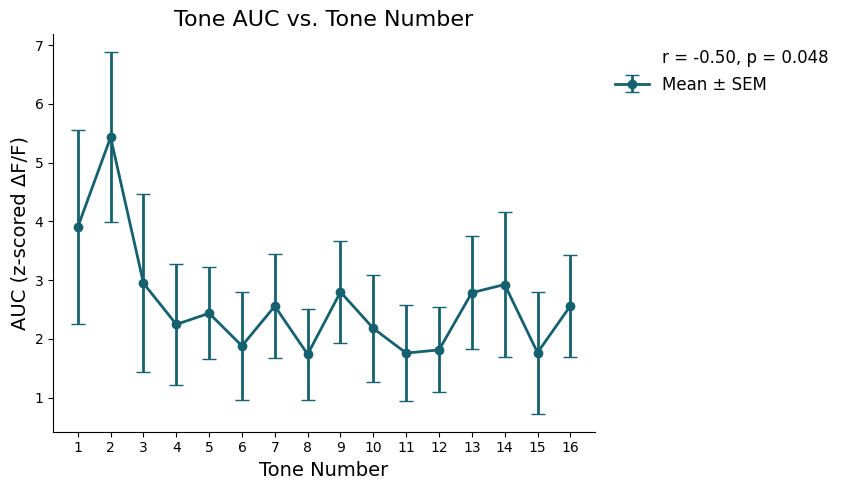

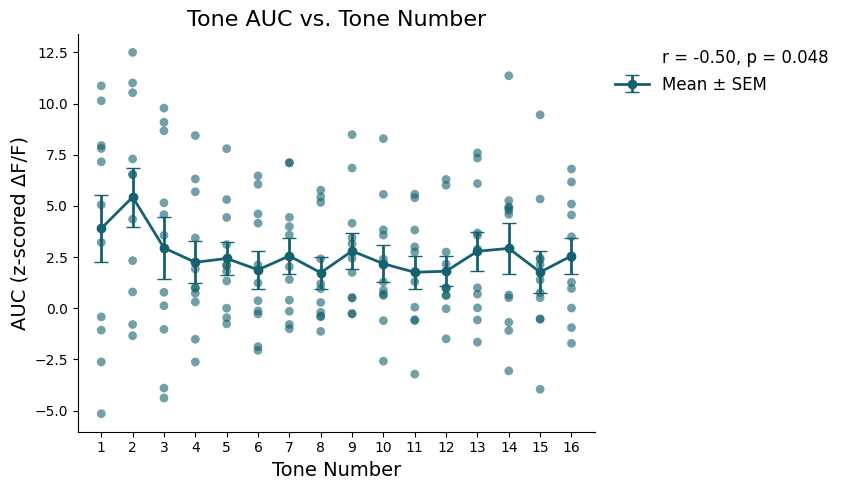

In [7]:
exp.plot_sequential_event('Tone AUC',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Tone AUC vs. Tone Number')
exp.plot_sequential_event('Tone AUC',
                      color= brain_region,
                      individual_dots=True,
                      xlabel='Tone Number',
                      ylabel='AUC (z-scored ΔF/F)',
                      title='Tone AUC vs. Tone Number')


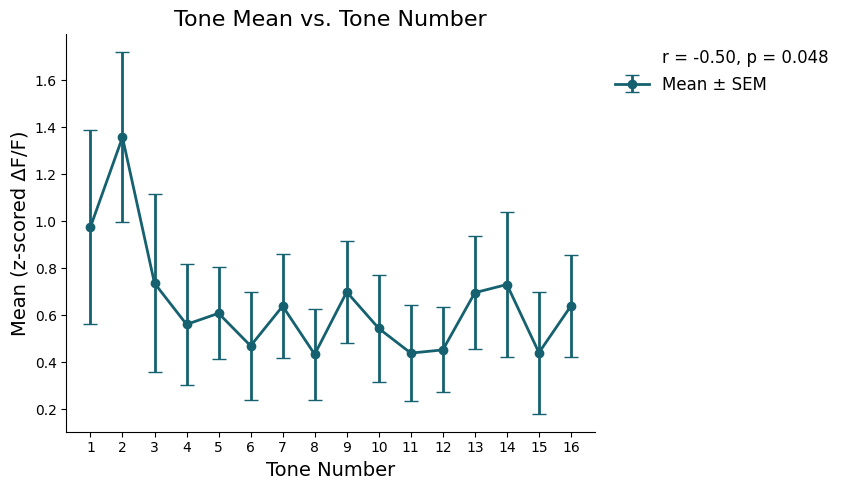

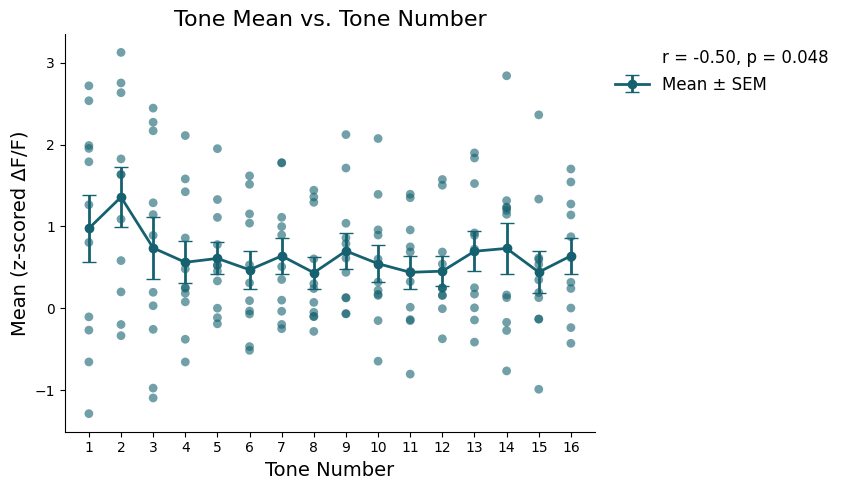

In [8]:
exp.plot_sequential_event('Tone Mean Z-score',
                      color= brain_region,
                      individual_dots=False,
                      xlabel='Tone Number',
                      ylabel='Mean (z-scored ΔF/F)',
                      title='Tone Mean vs. Tone Number')

exp.plot_sequential_event('Tone Mean Z-score',
                      color= brain_region,
                      individual_dots=True,
                      xlabel='Tone Number',
                      ylabel='Mean (z-scored ΔF/F)',
                      title='Tone Mean vs. Tone Number')


Make sure that if there is a difference between cohorst in the number of tones that are made, it only calculates it based on the lowest amount. 